In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path

import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "10k_heart"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plots
Lg_plot_jpg = data_subfolder + "_Figure_3.jpg"
Sg_plot_jpg = data_subfolder + "_Figure_5.jpg"

# input data
nru_dict_pkl =  "nru_dict.pkl"
scanpy_variance_pkl = "residual_variance_scanpy.pkl"
SCT_variance_pkl = "SCT_v2_residual_variance.pkl"


# paths: output plots
Lg_plot_dsn = data_path / Lg_plot_jpg
Sg_plot_dsn = data_path / Sg_plot_jpg

# paths: input data
nru_dict_dsn = data_path / nru_dict_pkl
scanpy_variance_dsn = data_path / scanpy_variance_pkl
SCT_variance_dsn = data_path / SCT_variance_pkl

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]	

bins_500 = [ 0, 20, 50, 100, 200, 500, 1e6]
labels_500 = ['1-20', '21-50', '51-100', '101-200', '201-500', '501+']

In [5]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]
df_gene_stats.insert ( 3, 'rank_A_g', df_gene_stats['A_g'].rank ( ascending=False ) )

print ( '\n\n df_gene_stats'  )
print ( df_gene_stats  )
print ( '\n\n df_gene_stats.describe' )
print ( df_gene_stats.describe ( percentiles=pctl_list ) )



 df_gene_stats
                    nz_cells          M_g          A_g  rank_A_g
ENSMUSG00000052305      6202  5632.169642  5431.424034       1.0
ENSMUSG00000069919      2897  1465.445393  1391.789121       2.0
ENSMUSG00000073940      2925  1444.191949  1383.160300       3.0
ENSMUSG00000069917      2625  1017.600302   971.366465       4.0
ENSMUSG00000038791       802  1390.212454   603.920335       5.0
...                      ...          ...          ...       ...
ENSMUSG00000020905        54     0.611757     0.443594   14457.0
ENSMUSG00000027313        50     0.580312     0.443594   14457.0
ENSMUSG00000104861        55     0.552270     0.443594   14457.0
ENSMUSG00000041144        56     0.650507     0.443594   14457.0
ENSMUSG00000000154        58     0.535058     0.443594   14457.0

[14472 rows x 4 columns]


 df_gene_stats.describe
           nz_cells           M_g           A_g      rank_A_g
count  14472.000000  14472.000000  14472.000000  14472.000000
mean    1309.836788      3.

In [6]:
df_Lg = pd.read_pickle ( scanpy_variance_dsn ).rename( columns={'CLIPPED':'L_g'} )
df_Lg.insert ( 2, 'rank_L_g', df_Lg['L_g'].rank ( ascending=False ) )
df_Lg.insert ( 3, 'clipping_effect', ( ~ ( df_Lg['L_g'] == df_Lg['UNCLIPPED'] ) ).astype(int) )

print ( '\n\n df_Lg'  )
print ( df_Lg  )
print ( '\n\n df_Lg.describe' )
print ( df_Lg.describe ( percentiles=pctl_list ) )

print (  '\n\n df_Lg[clipping_effect].sum() \n\n', df_Lg['clipping_effect'].sum()  )



 df_Lg
                           L_g    UNCLIPPED  rank_L_g  clipping_effect
ENSMUSG00000052305  987.369677  2134.180098       1.0                1
ENSMUSG00000069919  668.658665   959.468398       2.0                1
ENSMUSG00000073940  400.280374   922.209307       4.0                1
ENSMUSG00000069917  590.400652   733.295277       3.0                1
ENSMUSG00000038791   12.462472   956.768047     171.0                1
...                        ...          ...       ...              ...
ENSMUSG00000020905    0.611010     0.611010   14430.0                0
ENSMUSG00000027313    0.579941     0.579941   14452.0                0
ENSMUSG00000104861    0.551858     0.551858   14463.0                0
ENSMUSG00000041144    0.649768     0.649768   14385.0                0
ENSMUSG00000000154    0.534641     0.534641   14465.0                0

[14472 rows x 4 columns]


 df_Lg.describe
                L_g     UNCLIPPED      rank_L_g  clipping_effect
count  14472.000000  14472.000

In [7]:
df_Sg = pd.read_pickle ( SCT_variance_dsn ).rename( columns={'residual_variance':'S_g'} )
df_Sg.insert ( 1, 'rank_S_g', df_Sg['S_g'].rank ( ascending=False ) )

print ( '\n\n df_Sg'  )
print ( df_Sg  )
print ( '\n\n df_Sg.describe' )
print ( df_Sg.describe ( percentiles=pctl_list ) )



 df_Sg
                           S_g  rank_S_g
ENSMUSG00000052305  926.243049       1.0
ENSMUSG00000069919  902.544951       2.0
ENSMUSG00000073940  677.656626       4.0
ENSMUSG00000069917  884.129281       3.0
ENSMUSG00000038791   13.071136     212.0
...                        ...       ...
ENSMUSG00000020905    0.175468   14375.0
ENSMUSG00000027313    0.152987   14461.0
ENSMUSG00000104861    0.192102   14283.0
ENSMUSG00000041144    0.216514   14163.0
ENSMUSG00000000154    0.189209   14304.0

[14472 rows x 2 columns]


 df_Sg.describe
                S_g      rank_S_g
count  14472.000000  14472.000000
mean       2.061118   7236.500000
std       17.154998   4177.850883
min        0.123645      1.000000
1%         0.185464    145.710000
5%         0.284811    724.550000
10%        0.370676   1448.100000
25%        0.553070   3618.750000
50%        0.734141   7236.500000
75%        1.065416  10854.250000
90%        1.940589  13024.900000
95%        3.696146  13748.450000
99%       21.

In [8]:
df_compare_Lg = pd.concat ( [ df_gene_stats, df_Lg], axis=1, sort=False )
df_compare_Lg.insert ( 8, '_rank_A_g_', pd.cut ( df_compare_Lg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Lg.insert ( 9, '_rank_L_g_', pd.cut ( df_compare_Lg['rank_L_g'], bins_500, labels=labels_500 ) )

pd.set_option('display.max_columns', 9)
print ( '\n\n df_compare_Lg'  )
print ( df_compare_Lg  )
print ( '\n\n df_compare_Lg.describe' )
print ( df_compare_Lg.describe ( percentiles=pctl_list ) )

pti_Lg = pv_table_noprint_margins ( df_compare_Lg, '_rank_A_g_', '_rank_L_g_' )
print ( '\n\n Table 4 \n relation between ranks of Ag and Lg\n' )
print ( pti_Lg )



 df_compare_Lg
                    nz_cells          M_g          A_g  rank_A_g  ...  \
ENSMUSG00000052305      6202  5632.169642  5431.424034       1.0  ...   
ENSMUSG00000069919      2897  1465.445393  1391.789121       2.0  ...   
ENSMUSG00000073940      2925  1444.191949  1383.160300       3.0  ...   
ENSMUSG00000069917      2625  1017.600302   971.366465       4.0  ...   
ENSMUSG00000038791       802  1390.212454   603.920335       5.0  ...   
...                      ...          ...          ...       ...  ...   
ENSMUSG00000020905        54     0.611757     0.443594   14457.0  ...   
ENSMUSG00000027313        50     0.580312     0.443594   14457.0  ...   
ENSMUSG00000104861        55     0.552270     0.443594   14457.0  ...   
ENSMUSG00000041144        56     0.650507     0.443594   14457.0  ...   
ENSMUSG00000000154        58     0.535058     0.443594   14457.0  ...   

                    rank_L_g  clipping_effect  _rank_A_g_  _rank_L_g_  
ENSMUSG00000052305       1.0      

In [9]:
df_compare_Sg = pd.concat ( [ df_gene_stats, df_Sg], axis=1, sort=False )
df_compare_Sg.insert ( 6, '_rank_A_g_', pd.cut ( df_compare_Sg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Sg.insert ( 7, '_rank_S_g_', pd.cut ( df_compare_Sg['rank_S_g'], bins_500, labels=labels_500 ) )

print ( '\n\n df_compare_Sg'  )
print ( df_compare_Sg  )
print ( '\n\n df_compare_Sg.describe' )
print ( df_compare_Sg.describe ( percentiles=pctl_list ) )

pti_Sg = pv_table_noprint_margins ( df_compare_Sg, '_rank_A_g_', '_rank_S_g_' )
print ( '\n\n Table 6 \n relation between ranks of Ag and Sg\n' )
print ( pti_Sg )



 df_compare_Sg
                    nz_cells          M_g          A_g  rank_A_g         S_g  \
ENSMUSG00000052305      6202  5632.169642  5431.424034       1.0  926.243049   
ENSMUSG00000069919      2897  1465.445393  1391.789121       2.0  902.544951   
ENSMUSG00000073940      2925  1444.191949  1383.160300       3.0  677.656626   
ENSMUSG00000069917      2625  1017.600302   971.366465       4.0  884.129281   
ENSMUSG00000038791       802  1390.212454   603.920335       5.0   13.071136   
...                      ...          ...          ...       ...         ...   
ENSMUSG00000020905        54     0.611757     0.443594   14457.0    0.175468   
ENSMUSG00000027313        50     0.580312     0.443594   14457.0    0.152987   
ENSMUSG00000104861        55     0.552270     0.443594   14457.0    0.192102   
ENSMUSG00000041144        56     0.650507     0.443594   14457.0    0.216514   
ENSMUSG00000000154        58     0.535058     0.443594   14457.0    0.189209   

                    ra

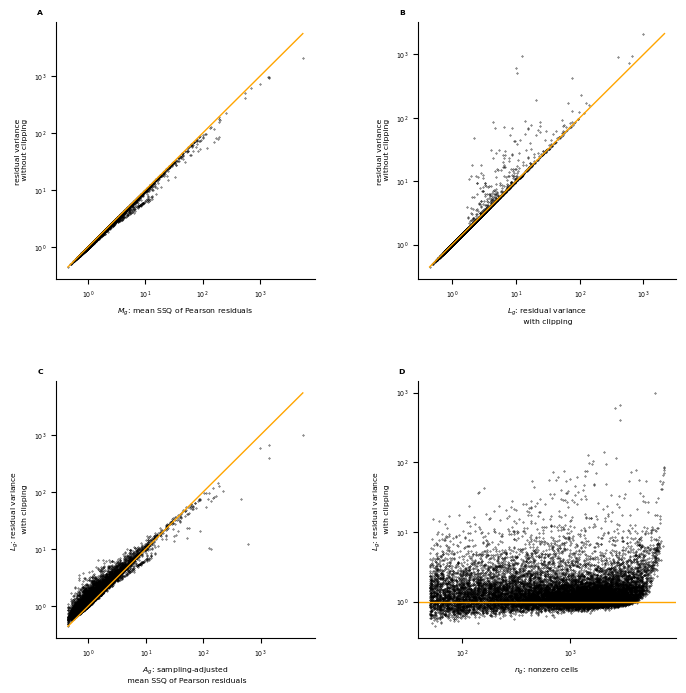

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )

plot_ax ( df_compare_Lg, ax1, 'A', 'M_g', 'UNCLIPPED','$M_g$: mean SSQ of Pearson residuals',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax2, 'B', 'L_g', 'UNCLIPPED','$L_g$: residual variance \n with clipping',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax3, 'C', 'A_g', 'L_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$L_g$: residual variance \n with clipping' )
plot_ax ( df_compare_Lg, ax4, 'D', 'nz_cells', 'L_g', '$n_g$: nonzero cells',  '$L_g$: residual variance \n with clipping', line_slope='horizontal' )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( Lg_plot_dsn, transparent=True, dpi=300 ) 

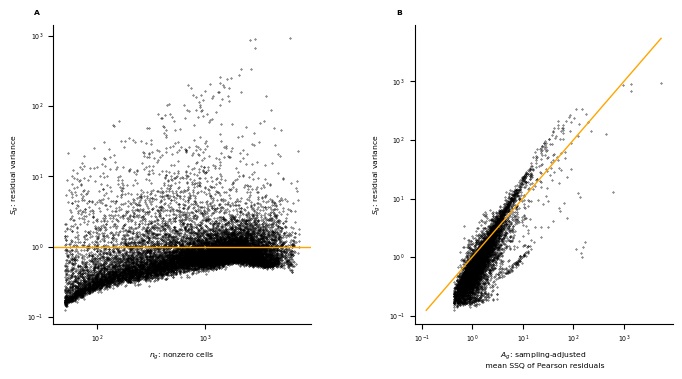

In [11]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=( 8., 4.4 ) )

plot_ax ( df_compare_Sg, ax1, 'A',  'nz_cells', 'S_g', '$n_g$: nonzero cells',   '$S_g$: residual variance', line_slope='horizontal'  )
plot_ax ( df_compare_Sg, ax2, 'B', 'A_g', 'S_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$S_g$: residual variance'  )

plt.subplots_adjust( bottom=0.2, wspace=0.4 )

plt.savefig( Sg_plot_dsn, transparent=True, dpi=300 ) 